In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import pandas as pd
import seaborn as sns
from IPython.display import display, Math, Latex
import re
import matplotlib.colors as mcolors
from data_utils import plot_workload_2d


HOME_DIR = os.getcwd()

In [2]:
os.chdir(HOME_DIR)
os.chdir("../experiment_results/rho_multiples") 
files = ['uniform.csv', 
         'unimodal_1.csv', 'unimodal_2.csv', 'unimodal_3.csv', 'unimodal_4.csv', 
         'bimodal_1.csv', 'bimodal_2.csv', 'bimodal_3.csv', 'bimodal_4.csv', 'bimodal_5.csv', 'bimodal_6.csv',
         'trimodal_1.csv', 'trimodal_2.csv', 'trimodal_3.csv', 'trimodal_4.csv'
        ]

## Plots With Error Bars

Ran each trial $5$ times. 

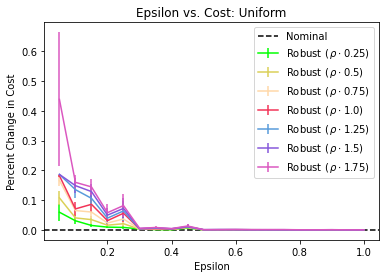

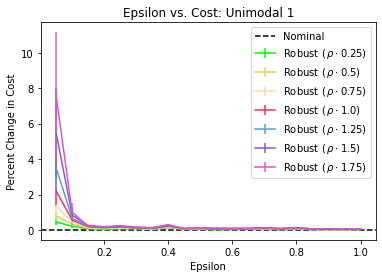

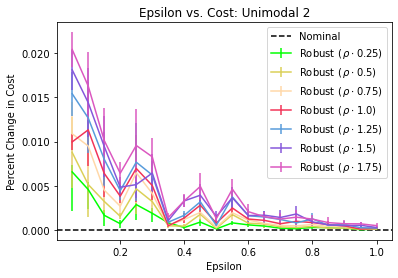

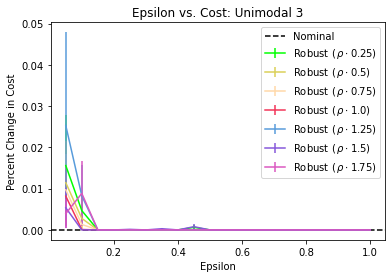

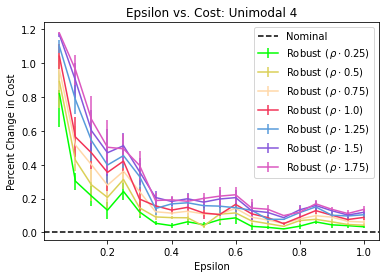

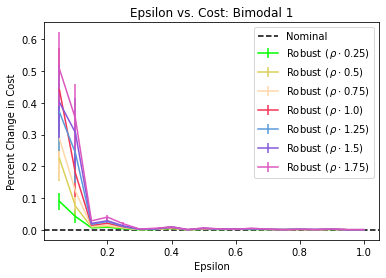

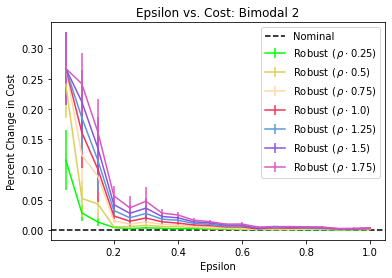

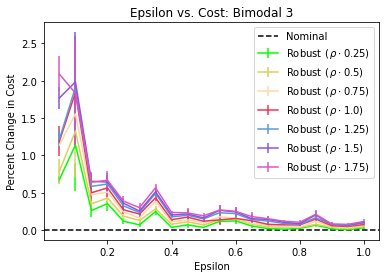

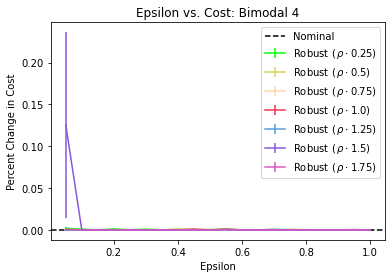

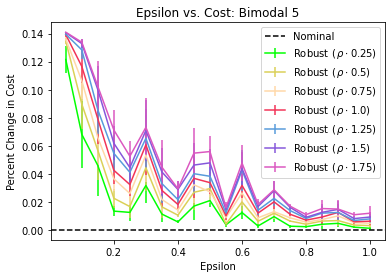

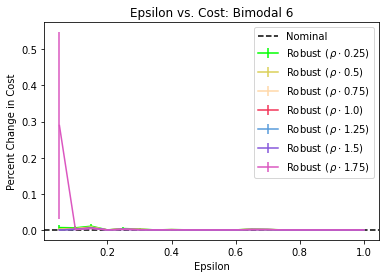

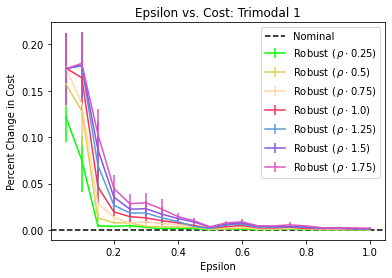

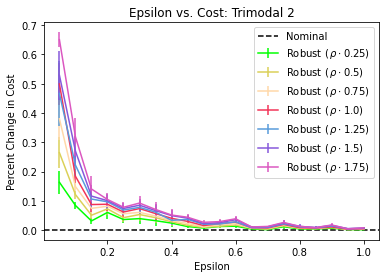

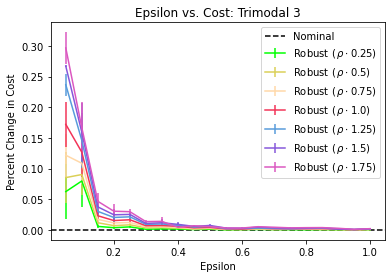

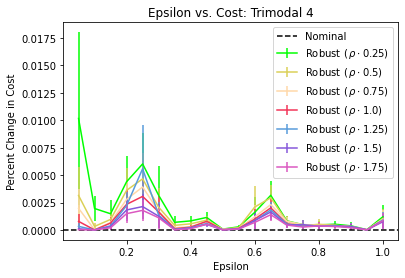

In [3]:
palette = sns.color_palette("hls", 7)
palette[3] = (0.95, 0.2, 0.34)
palette[0] = (0.0, 1.0, 0.0)
palette[2] = (1.0, 0.847, 0.659)

for file_num in range(len(files)): 
    df = pd.read_csv(files[file_num])
    name = files[file_num].split('.')[0]
    name = name.replace('_', ' ')
    name = name.capitalize()
    df['Percent Change'] = (df['Robust Cost'] - df['Nominal Cost'])/df['Nominal Cost']
    percent_change = df.groupby(['Epsilon', 'Rho Multiplier'])['Percent Change'].apply(np.array).reset_index()
    percent_change['mean'] = percent_change['Percent Change'].apply(lambda x: x.mean())
    percent_change['error'] = percent_change['Percent Change'].apply(lambda x: x.std()/np.sqrt(len(x)))
    
    for i, mult in enumerate(percent_change['Rho Multiplier'].unique()): 
        selection = percent_change[percent_change['Rho Multiplier'] == mult]
        plt.errorbar(selection['Epsilon'].to_numpy(), selection['mean'].to_numpy(), yerr=selection['error'].to_numpy(), label=rf'Robust ($\,\rho \cdot ${mult})', color=palette[i])

    plt.axhline(y=0, color='black', linestyle="--", label="Nominal")
    plt.legend()
    plt.xlabel('Epsilon')
    plt.ylabel('Percent Change in Cost')
    title = "Epsilon vs. Cost: " + name
    plt.title(title)
    plt.show()

I think what this tells us is our $\rho$ multiplier step size is too small, since the error bars are overlapping with one another. Maybe for our final graphs, we can just pick three: $[0.25, 1, 1.75]$. The largest error bars are for $\varepsilon \leq 0.2$, which are also the regions where differential privacy has the largest effect on increasing the robust cost. 

## Plots Without Error Bars

Each point is the average out of $5$ trials. 

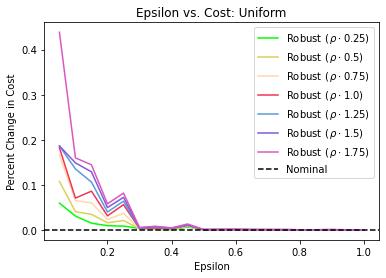

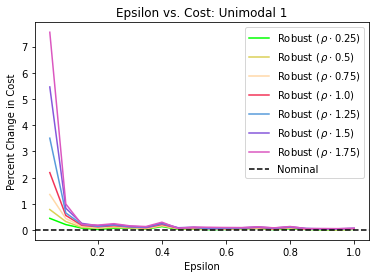

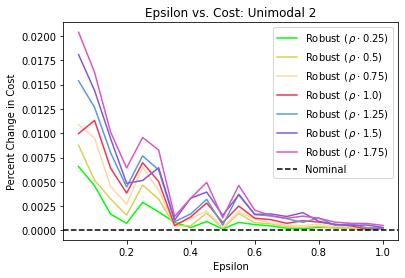

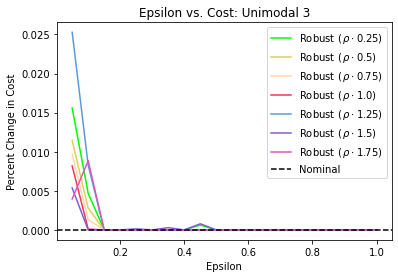

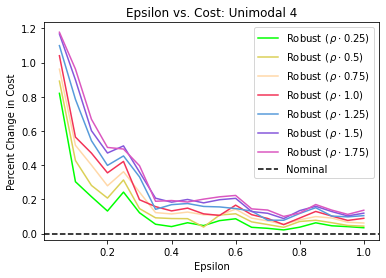

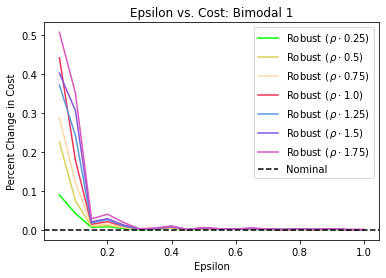

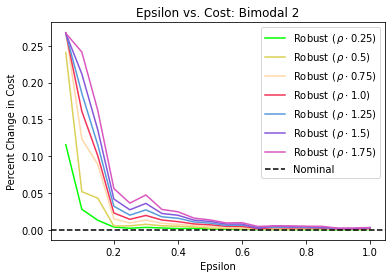

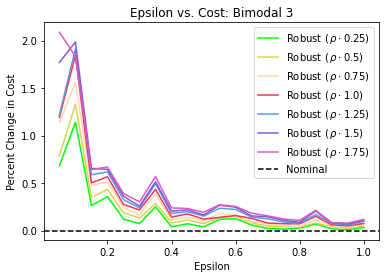

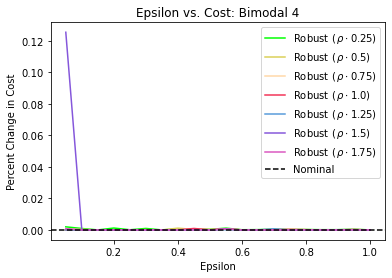

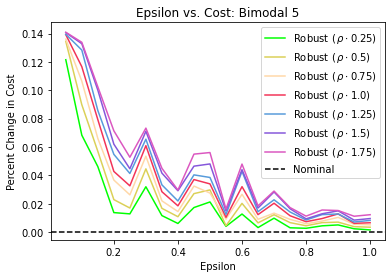

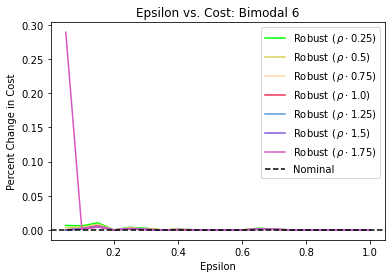

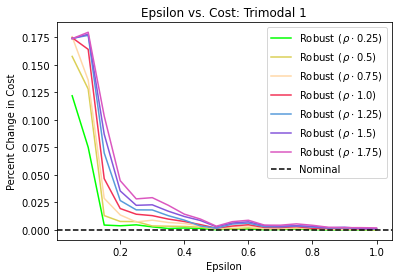

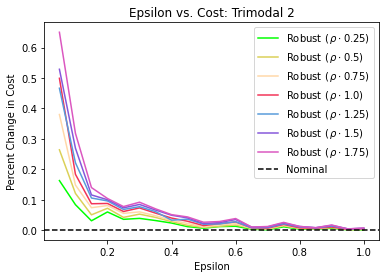

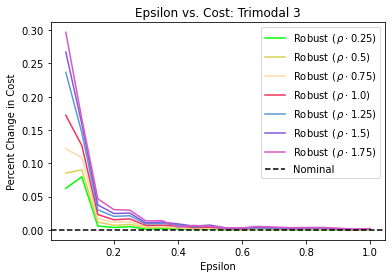

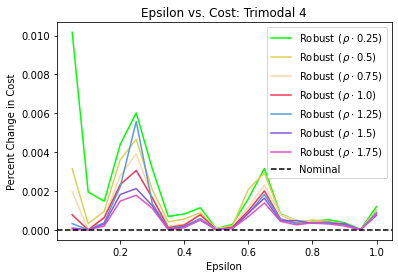

In [4]:
palette = sns.color_palette("hls", 7)
palette[3] = (0.95, 0.2, 0.34)
palette[0] = (0.0, 1.0, 0.0)
palette[2] = (1.0, 0.847, 0.659)

for file_num in range(len(files)): 
    df = pd.read_csv(files[file_num])
    name = files[file_num].split('.')[0]
    name = name.replace('_', ' ')
    name = name.capitalize()
    df['Percent Change'] = (df['Robust Cost'] - df['Nominal Cost'])/df['Nominal Cost']
    percent_change = df.groupby(['Epsilon', 'Rho Multiplier'])['Percent Change'].apply(np.array).reset_index()
    percent_change['mean'] = percent_change['Percent Change'].apply(lambda x: x.mean())
    percent_change['error'] = percent_change['Percent Change'].apply(lambda x: x.std()/np.sqrt(len(x)))
    
    for i, mult in enumerate(percent_change['Rho Multiplier'].unique()): 
        selection = percent_change[percent_change['Rho Multiplier'] == mult]
        plt.plot(selection['Epsilon'].to_numpy(), selection['mean'].to_numpy(), label=rf'Robust ($\,\rho \cdot ${mult})', color=palette[i])

    plt.axhline(y=0, color='black', linestyle="--", label="Nominal")
    plt.legend()
    plt.xlabel('Epsilon')
    plt.ylabel('Percent Change in Cost')
    title = "Epsilon vs. Cost: " + name
    plt.title(title)
    plt.show()

## Workload Plots

#### Inverted $\rho$ Multiples Workload

Average True ρ: 0.05634
Standard Dev True ρ: 0.18096


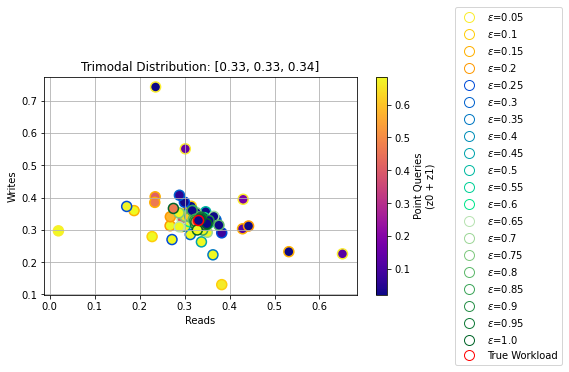

In [19]:
file = 'Trimodal_4.csv'
df = pd.read_csv(file)
print("Average True \u03C1:", round(df['Rho (True)'].mean(), 5))
print("Standard Dev True \u03C1:", round(df['Rho (True)'].std(), 5))
# color_range is a list of min, max for the gradient, if none is given, it automatically scales
plot_workload_2d(file, outline_size=1.5, color_range=None) 

Large difference between true workload and noisy workloads for point queries. 

#### Percent Change Doesn't Seem to Reach 0

Average True ρ: 0.02605
Standard Dev True ρ: 0.06207


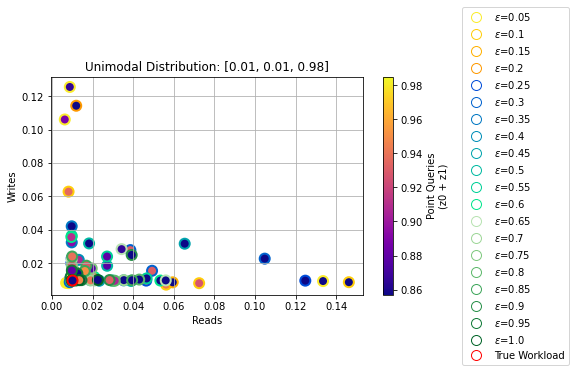

Average True ρ: 0.03183
Standard Dev True ρ: 0.08288


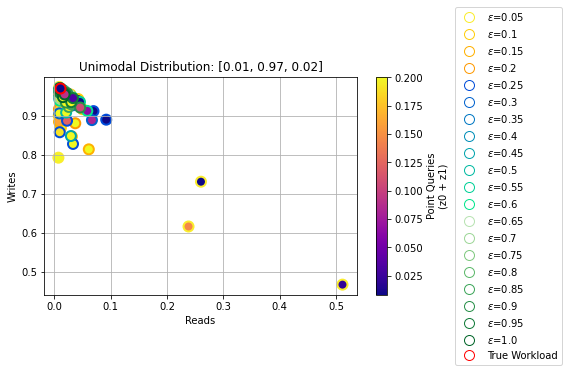

Average True ρ: 0.04047
Standard Dev True ρ: 0.1902


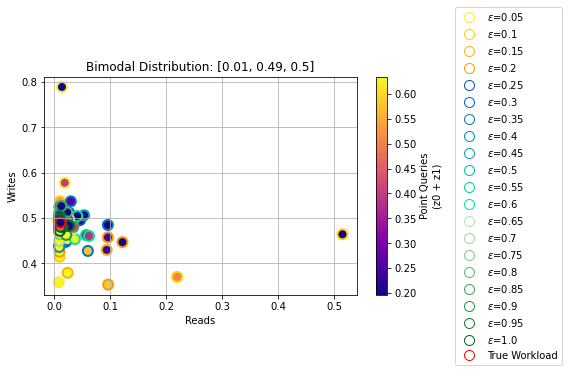

Average True ρ: 0.04164
Standard Dev True ρ: 0.12529


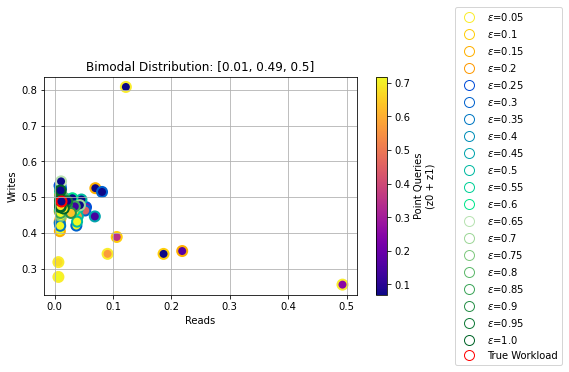

In [20]:
files = ['Unimodal_2.csv', 'Unimodal_4.csv', 'Bimodal_3.csv', 'Bimodal_5.csv']

for file in files: 
    df = pd.read_csv(file)
    print("Average True \u03C1:", round(df['Rho (True)'].mean(), 5))
    print("Standard Dev True \u03C1:", round(df['Rho (True)'].std(), 5))
    # color_range is a list of min, max for the gradient, if none is given, it automatically scales
    plot_workload_2d(file, outline_size=2, color_range=None) 

#### Sharp Decline around $\varepsilon = 0.2$ and stays near 0 after (Common Trend)

Average True ρ: 0.04996
Standard Dev True ρ: 0.14341


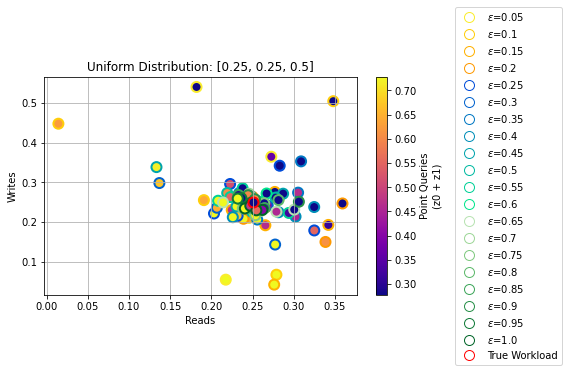

Average True ρ: 0.02458
Standard Dev True ρ: 0.05459


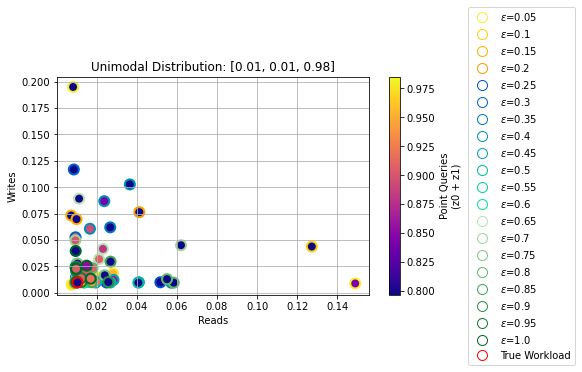

Average True ρ: 0.04904
Standard Dev True ρ: 0.13764


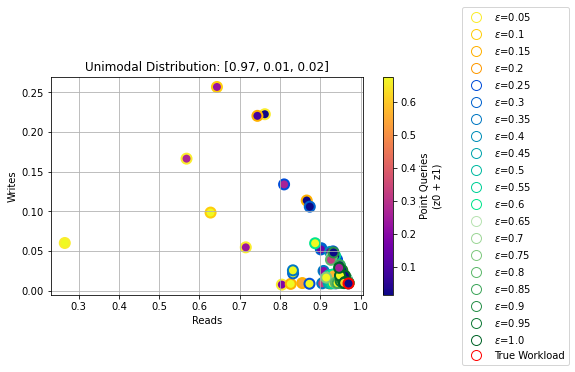

Average True ρ: 0.02319
Standard Dev True ρ: 0.04494


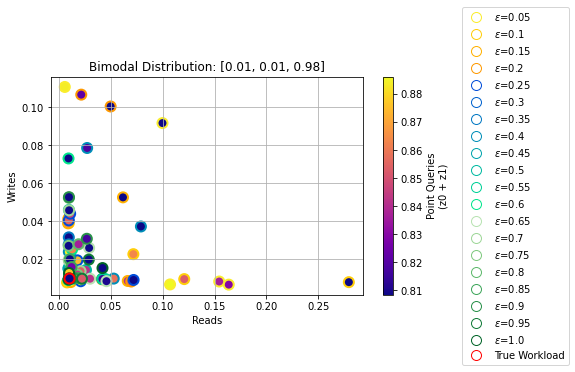

Average True ρ: 0.03301
Standard Dev True ρ: 0.12138


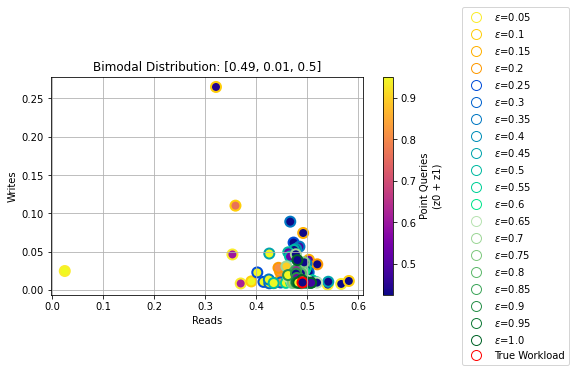

Average True ρ: 0.04068
Standard Dev True ρ: 0.15172


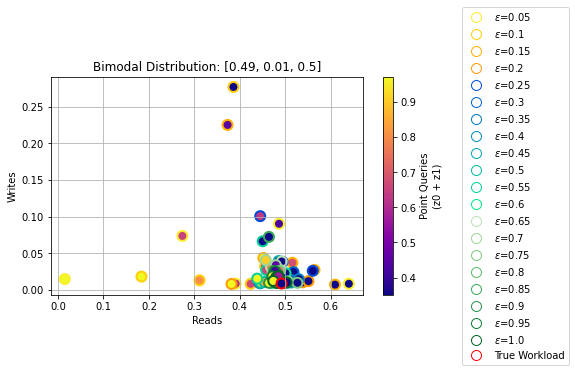

Average True ρ: 0.04331
Standard Dev True ρ: 0.17514


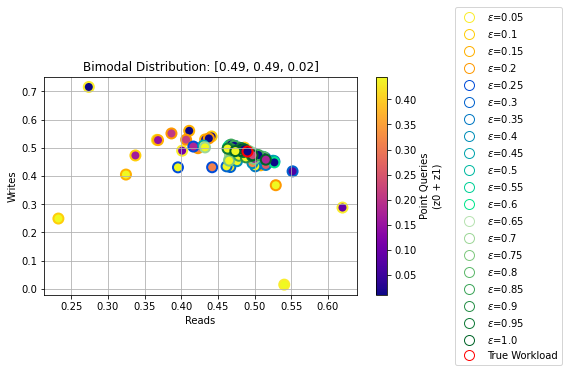

Average True ρ: 0.04265
Standard Dev True ρ: 0.15196


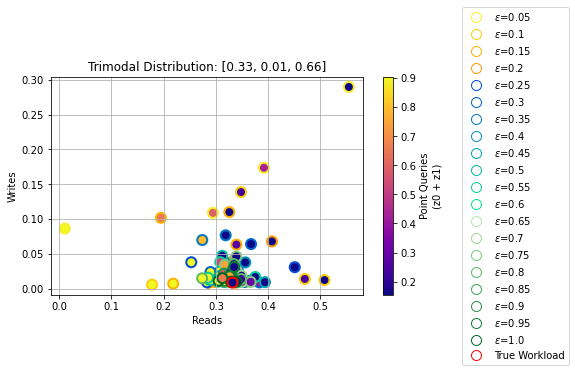

Average True ρ: 0.03405
Standard Dev True ρ: 0.11349


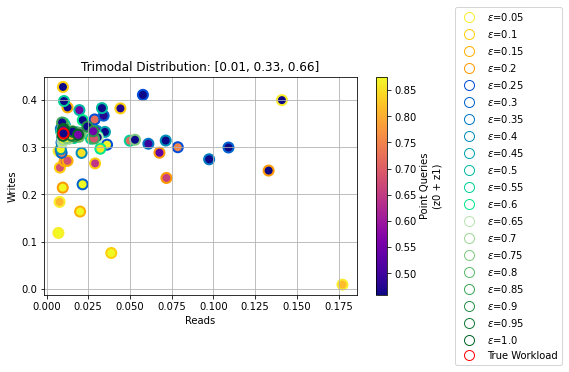

Average True ρ: 0.03064
Standard Dev True ρ: 0.10483


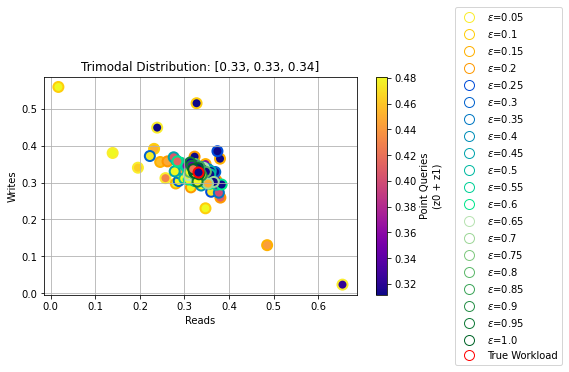

In [21]:
files = ['Uniform.csv', 'Unimodal_1.csv', 'Unimodal_3.csv', 'Bimodal_1.csv', 
         'Bimodal_2.csv', 'Bimodal_4.csv', 'Bimodal_6.csv', 
         'Trimodal_1.csv', 'Trimodal_2.csv', 'Trimodal_3.csv']

for file in files: 
    df = pd.read_csv(file)
    print("Average True \u03C1:", round(df['Rho (True)'].mean(), 5))
    print("Standard Dev True \u03C1:", round(df['Rho (True)'].std(), 5))
    # color_range is a list of min, max for the gradient, if none is given, it automatically scales
    plot_workload_2d(file, outline_size=2, color_range=None) 

Could the costs have to do with which operation is farthest? For example, maybe if the largest deviation is in writes, the cost will be more significantly affected. 

# Testing Different Workload Plots Below

Keeping it for now just in case we want other kinds of plots

## Workload Plots: 2D

In [5]:
def extract_probabilities_2d(workload_str): 
    pattern = r"=\s*([-+]?\d*\.\d+|\d+)"
    probs = [float(num) for num in re.findall(pattern, workload_str)]
    return [probs[0] + probs[1], probs[2], probs[3]]

In [6]:
def parse_workload_list_2d(workload_list):
    workloads = []
    for workload in workload_list: 
        workloads += [extract_probabilities_2d(workload)]
    
    x = [workload[0] for workload in workloads]    
    y = [workload[1] for workload in workloads]    
    gradient = [workload[2] for workload in workloads]
        
    return x, y, gradient

Make sure the gradient is the same across all epsilon values for writes

In [7]:
workloads = df.groupby(['Epsilon', 'Workload (True)'])['Workload (Perturbed)'].apply(np.array).reset_index()
workloads.head()

Epsilon                             Workload (True)  \
0     0.05  Workload(z0=0.01, z1=0.33, q=0.33, w=0.33)   
1     0.10  Workload(z0=0.01, z1=0.33, q=0.33, w=0.33)   
2     0.15  Workload(z0=0.01, z1=0.33, q=0.33, w=0.33)   
3     0.20  Workload(z0=0.01, z1=0.33, q=0.33, w=0.33)   
4     0.25  Workload(z0=0.01, z1=0.33, q=0.33, w=0.33)   

                                Workload (Perturbed)  
0  [Workload(z0=0.15778721915683203, z1=0.0171741...  
1  [Workload(z0=0.16769678746206135, z1=0.3254235...  
2  [Workload(z0=0.010586117229257648, z1=0.352444...  
3  [Workload(z0=0.10265257728801876, z1=0.2885644...  
4  [Workload(z0=0.045697375032036774, z1=0.280930...

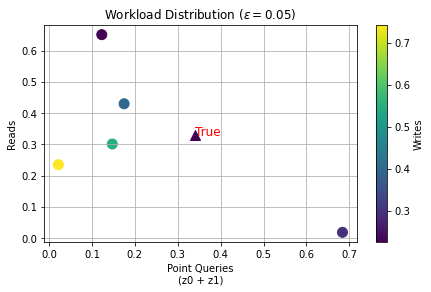

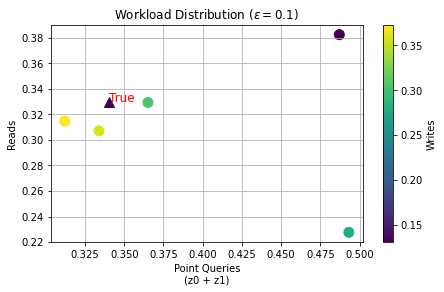

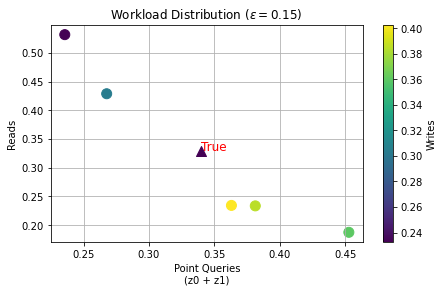

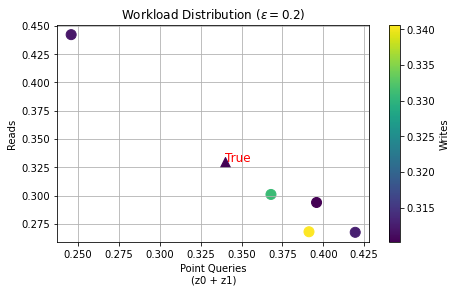

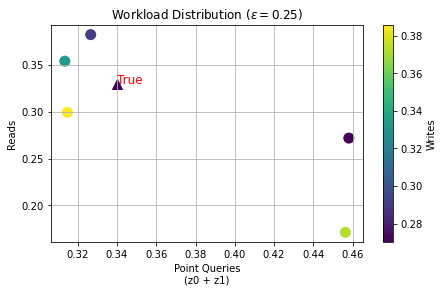

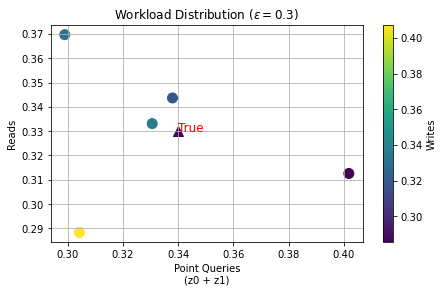

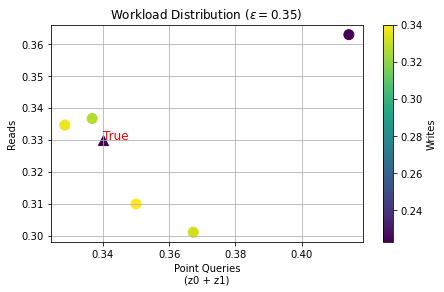

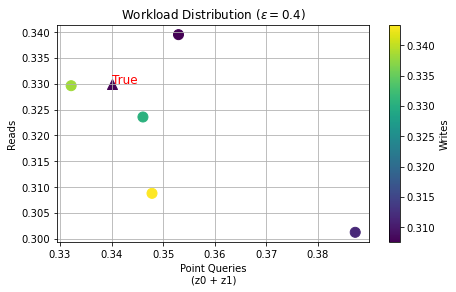

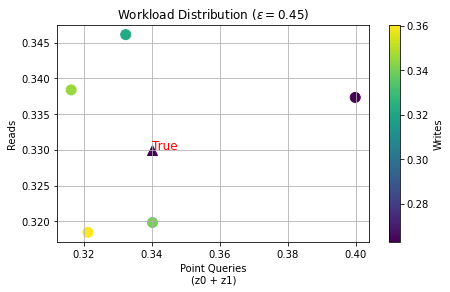

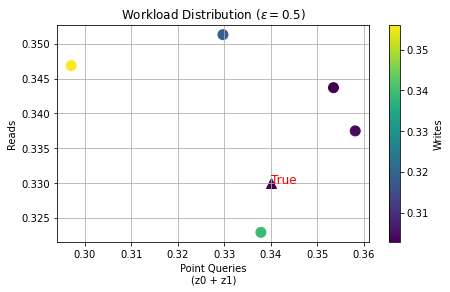

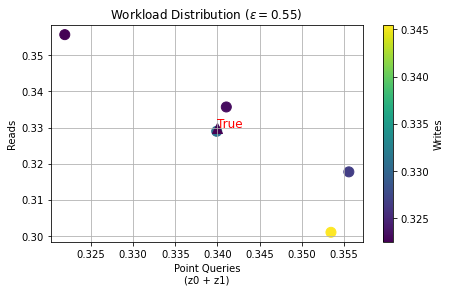

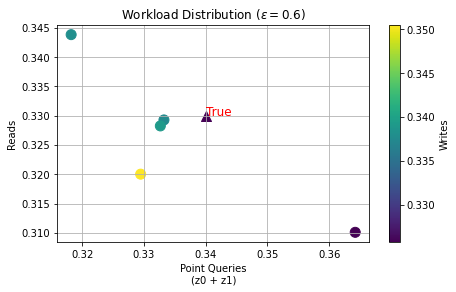

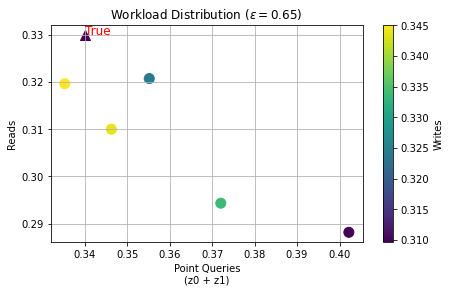

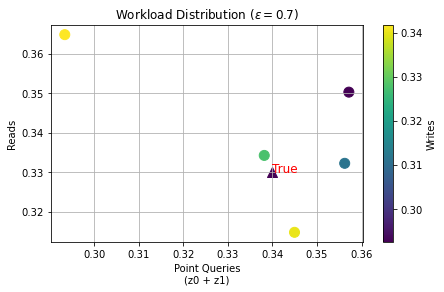

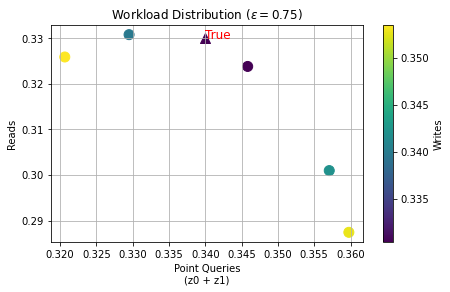

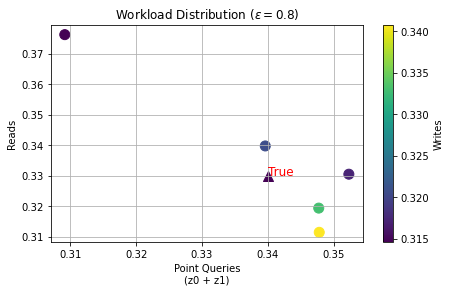

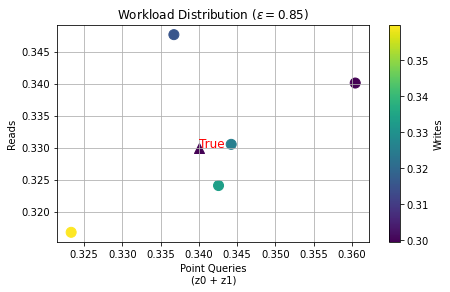

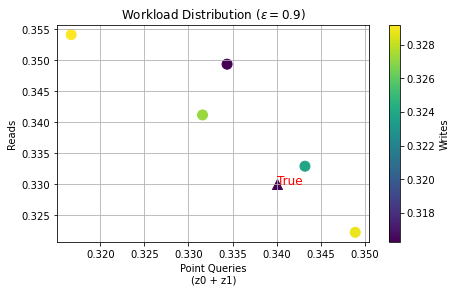

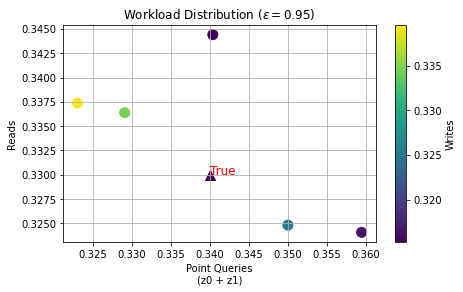

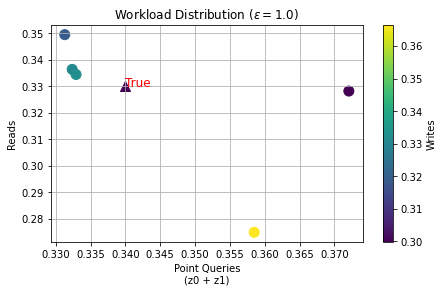

In [8]:
for epsilon in workloads['Epsilon'].unique():
    df = pd.read_csv('trimodal_1.csv')
    og = workloads[workloads['Epsilon'] == epsilon]['Workload (True)'].iloc[0]
    # (z0, z1, q, w)
    og = extract_probabilities_2d(og)
    wl_list = workloads[workloads['Epsilon'] == epsilon]['Workload (Perturbed)'].iloc[0]
    wl_list = list(set(wl_list))
    x, y, grad = parse_workload_list_2d(wl_list)

    plt.figure(figsize=(7, 4))
    scatter = plt.scatter(x, y, c=grad, cmap='viridis', s=100)
    plt.scatter([og[0]], [og[1]], c=[og[2]], cmap='viridis', marker='^', s=100)
    plt.text(og[0], og[1], 'True', fontsize=12, color='red')
    plt.colorbar(scatter, label='Writes')
    plt.xlabel('Point Queries\n(z0 + z1)')
    plt.ylabel('Reads')
    plt.title(rf'Workload Distribution ($\varepsilon = {round(epsilon, 2)}$)')
    plt.grid(True)
    plt.show()

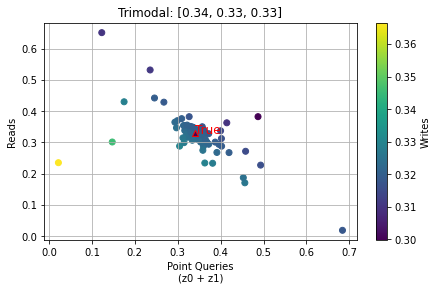

In [9]:
og = workloads.iloc[0]['Workload (True)']
matching = workloads[workloads['Workload (True)'] == og]
all_perturbed = np.concatenate(matching['Workload (Perturbed)'].values)
all_perturbed = list(set(all_perturbed))
x, y, grad = parse_workload_list_2d(all_perturbed)

fig, ax = plt.subplots(figsize=(7, 4))
og = extract_probabilities_2d(og)
ax.scatter(x, y, c=grad, cmap='viridis')
ax.scatter([og[0]], [og[1]], c=[og[2]], cmap='viridis', marker='^', edgecolor='red', linewidth=1)
ax.text(og[0], og[1], 'True', fontsize=12, color='red')
fig.colorbar(scatter, ax=ax, label='Writes')

ax.set_xlabel('Point Queries\n(z0 + z1)')
ax.set_ylabel('Reads')
ax.set_title(f'Trimodal: {og}')
ax.grid(True)

plt.show()

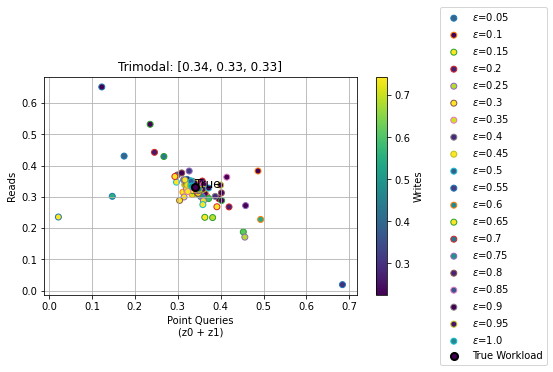

In [10]:
fig, ax = plt.subplots(figsize=(7, 4))

og = workloads.iloc[0]['Workload (True)']
og_vals = extract_probabilities_2d(og)


epsilon_values = sorted(workloads['Epsilon'].unique())
outline_colors = plt.cm.tab10.colors 

for idx, epsilon in enumerate(epsilon_values):
    matching = workloads[(workloads['Workload (True)'] == og) & 
                         (workloads['Epsilon'] == epsilon)]
    
    if not matching.empty:
        perturbed = np.concatenate(matching['Workload (Perturbed)'].values)
        perturbed = list(set(perturbed))
        x, y, grad = parse_workload_list_2d(perturbed)

        ax.scatter(x, y, c=grad, cmap='viridis',
                   edgecolor=outline_colors[idx % len(outline_colors)],
                   linewidth=1, label=rf'$\varepsilon$={round(epsilon, 2)}')

ax.scatter([og_vals[0]], [og_vals[1]], c=[og_vals[2]], cmap='viridis',
           edgecolor='black', linewidth=2, s=50, label='True Workload')
ax.text(og_vals[0], og_vals[1], 'True', fontsize=12, color='black')

fig.colorbar(ax.collections[0], ax=ax, label='Writes')
ax.set_xlabel('Point Queries\n(z0 + z1)')
ax.set_ylabel('Reads')
ax.set_title(f'Trimodal: {og_vals}')
ax.grid(True)
ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5))

plt.show()

## 3D Workload Plots

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import matplotlib.colors as mcolors

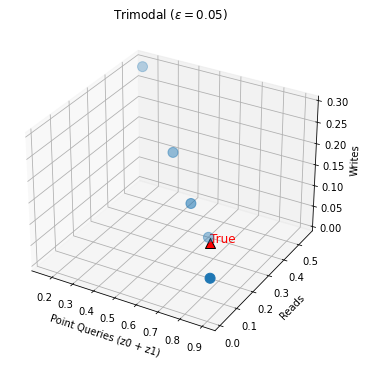

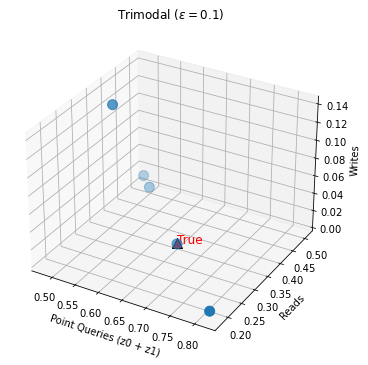

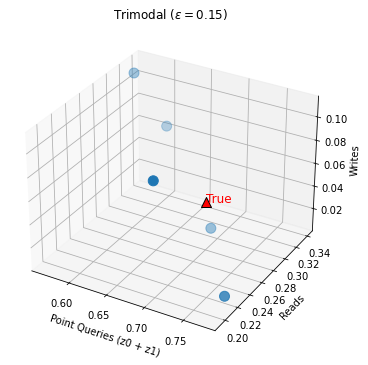

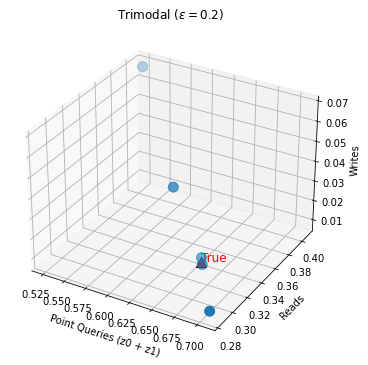

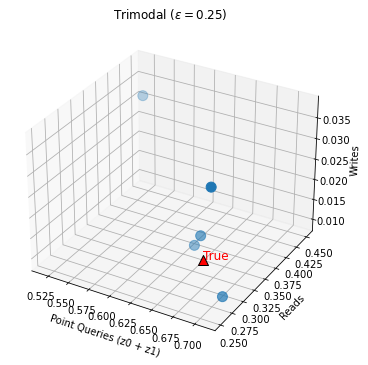

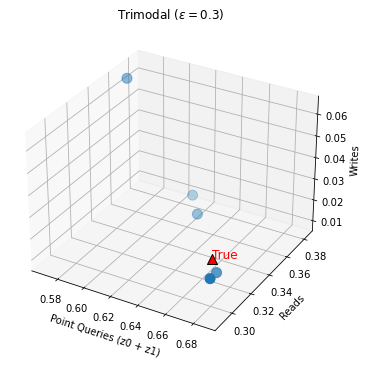

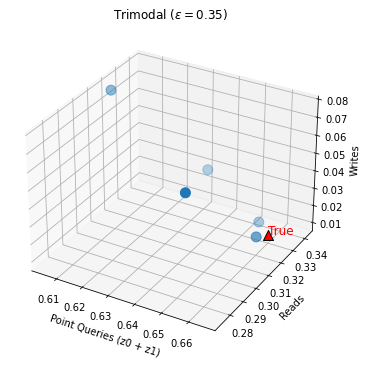

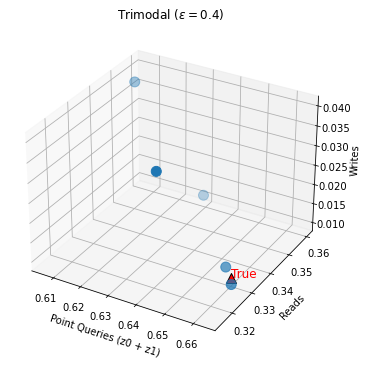

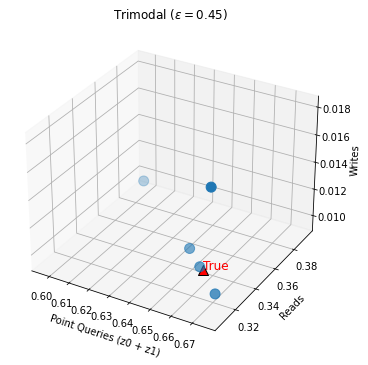

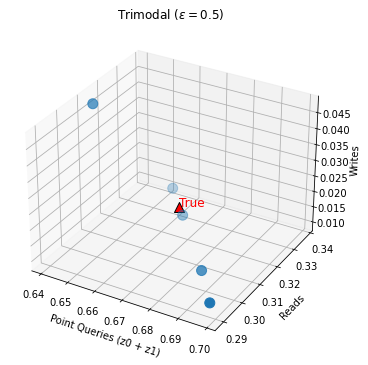

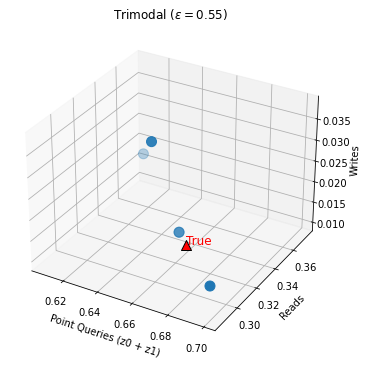

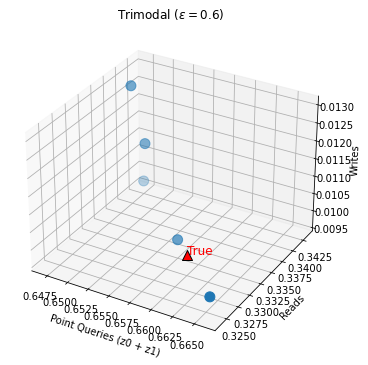

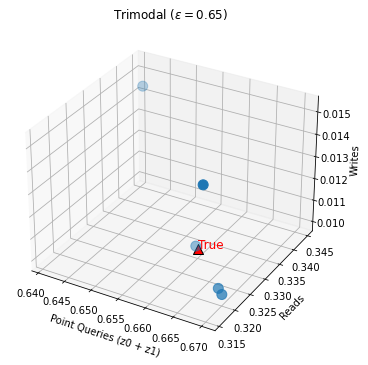

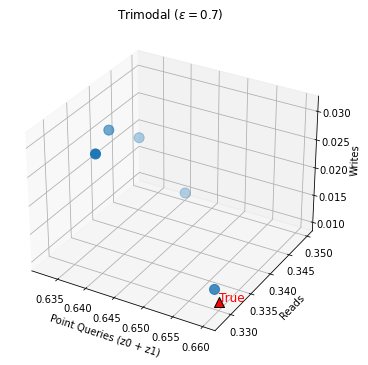

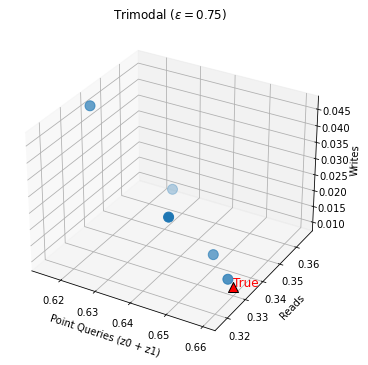

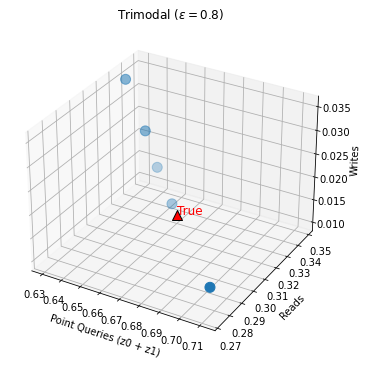

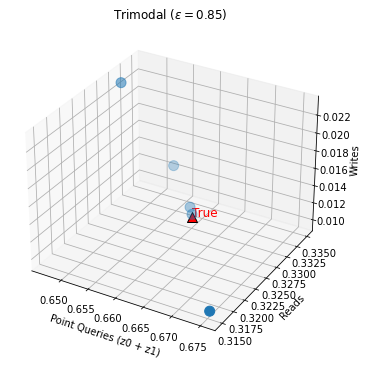

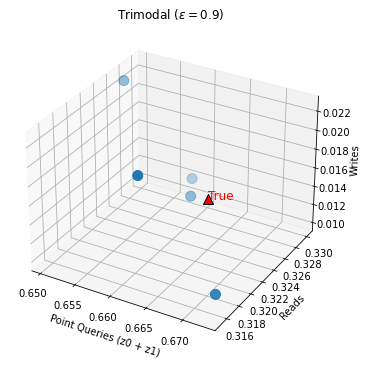

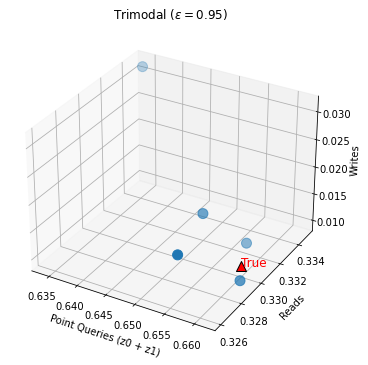

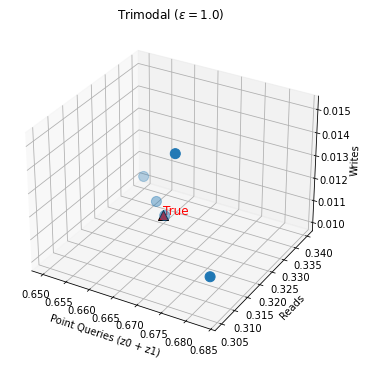

In [12]:
for epsilon in workloads['Epsilon'].unique():
    df = pd.read_csv('trimodal_1.csv')
    workloads = df.groupby(['Epsilon', 'Workload (True)'])['Workload (Perturbed)'].apply(np.array).reset_index()
    og = workloads[workloads['Epsilon'] == epsilon]['Workload (True)'].iloc[0]
    # (z0, z1, q, w)
    og = extract_probabilities_2d(og)

    wl_list = workloads[workloads['Epsilon'] == epsilon]['Workload (Perturbed)'].iloc[0]
    wl_list = list(set(wl_list))

    x, y, z = parse_workload_list_2d(wl_list)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(x, y, z, s=100, marker='o')
    ax.scatter(og[0], og[1], og[2], c='red', s=100, marker='^', edgecolors='black', label='True')
    ax.text(og[0], og[1], og[2], 'True', fontsize=12, color='red')

    ax.set_xlabel('Point Queries (z0 + z1)')
    ax.set_ylabel('Reads')
    ax.set_zlabel('Writes')

    ax.set_title(rf'Trimodal ($\varepsilon = {round(epsilon, 2)}$)')
    ax.grid(True)
    plt.show()

In [13]:
def extract_probabilities_3d(workload_str): 
    pattern = r"=\s*([-+]?\d*\.\d+|\d+)"
    dist = [float(num) for num in re.findall(pattern, workload_str)]
    # z0, q, w, z1
    dist = [dist[0], dist[2], dist[3], dist[0]]
    return dist

In [14]:
def parse_workload_list_3d(workload_list):
    workloads = []
    for workload in workload_list: 
        workloads += [extract_probabilities_3d(workload)]
    
    x = [workload[0] for workload in workloads]    
    y = [workload[1] for workload in workloads]    
    z = [workload[2] for workload in workloads]
    gradient = [workload[3] for workload in workloads]
        
    return x, y, z, gradient

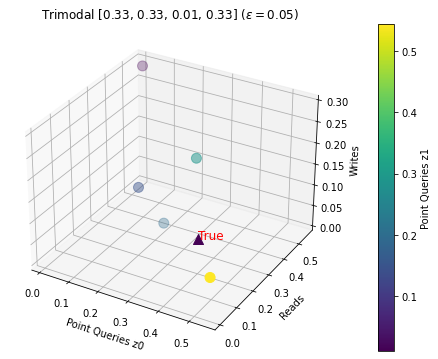

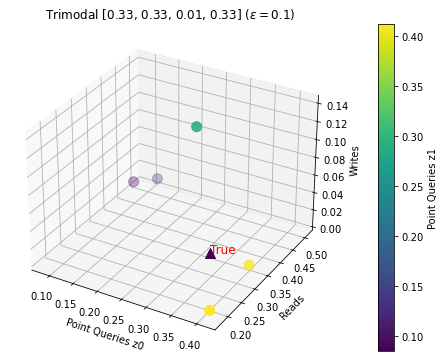

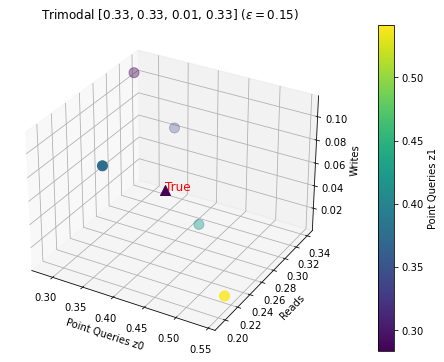

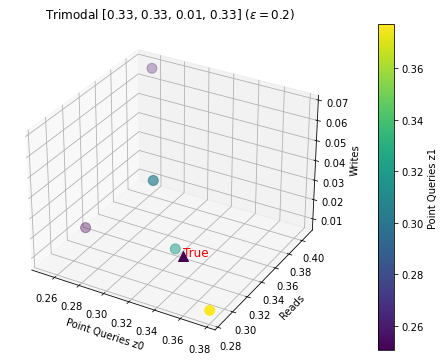

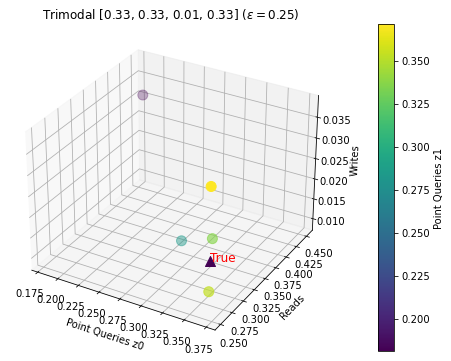

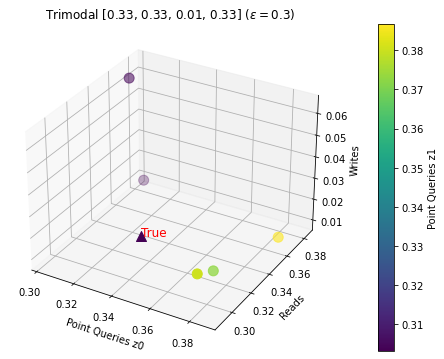

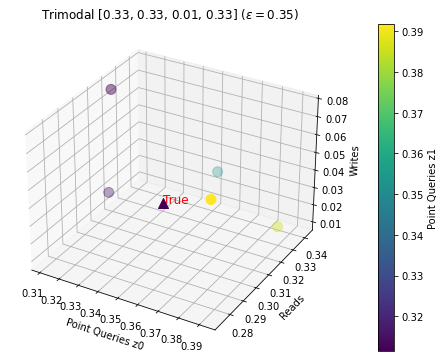

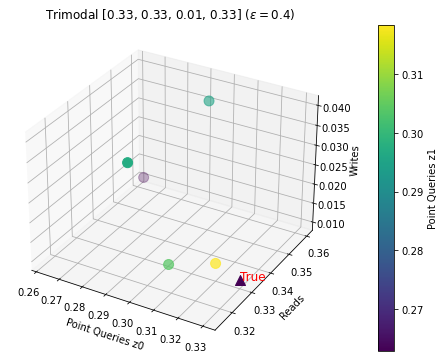

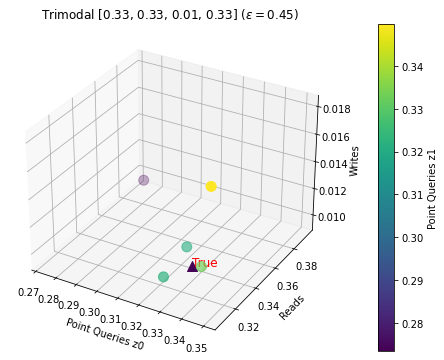

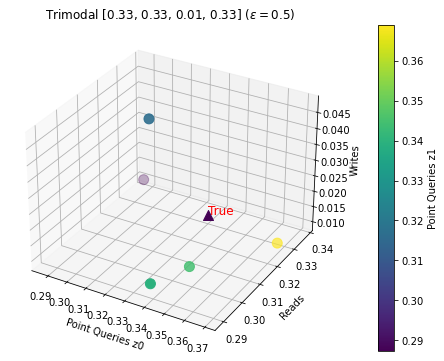

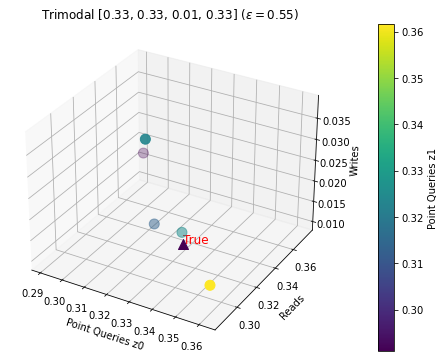

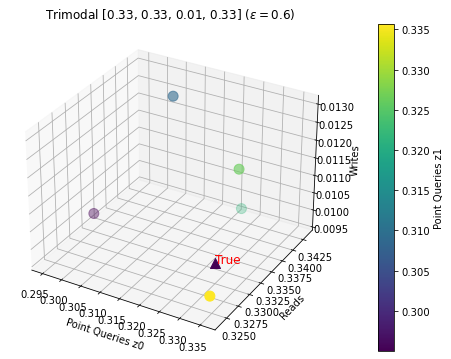

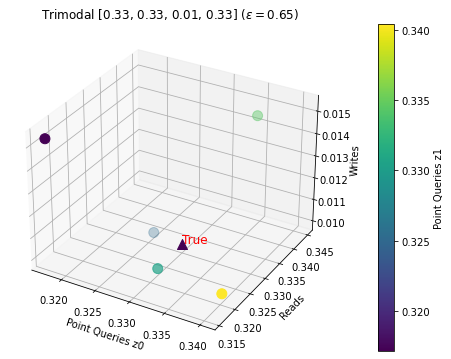

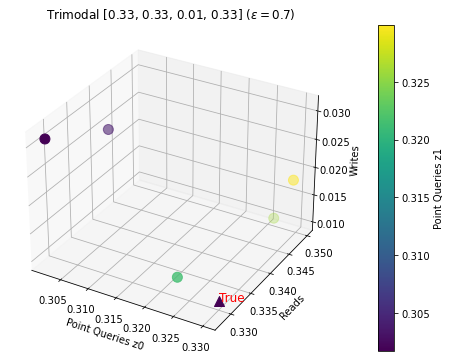

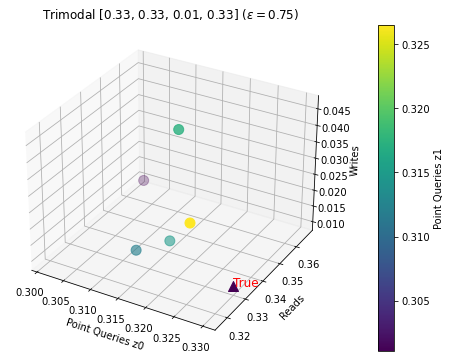

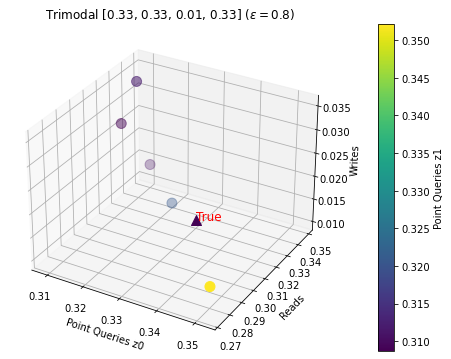

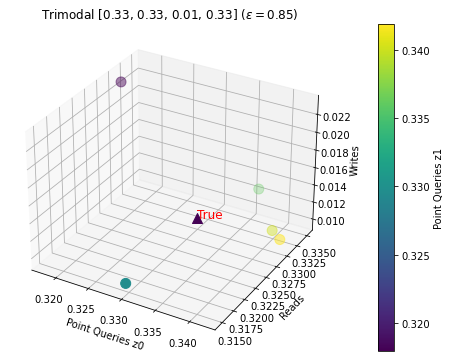

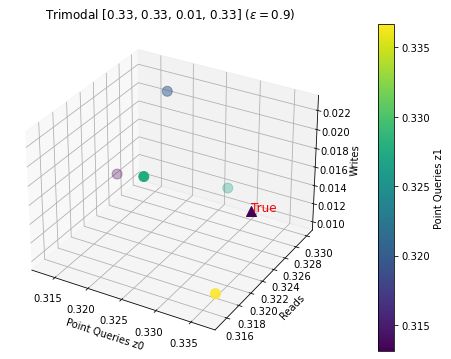

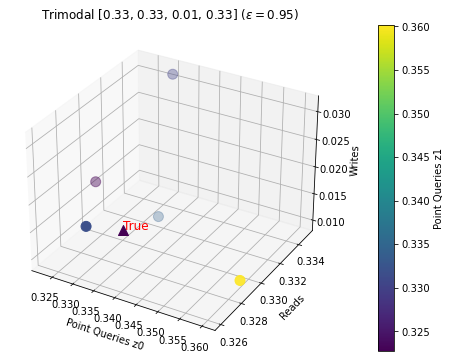

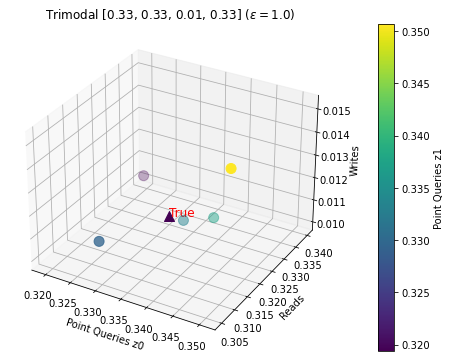

In [15]:
for epsilon in workloads['Epsilon'].unique():
    df = pd.read_csv('trimodal_1.csv')
    workloads = df.groupby(['Epsilon', 'Workload (True)'])['Workload (Perturbed)'].apply(np.array).reset_index()
    og = workloads[workloads['Epsilon'] == epsilon]['Workload (True)'].iloc[0]
    # (z0, z1, q, w)
    og = extract_probabilities_3d(og)

    wl_list = workloads[workloads['Epsilon'] == epsilon]['Workload (Perturbed)'].iloc[0]
    wl_list = list(set(wl_list))

    x, y, z, grad = parse_workload_list_3d(wl_list)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(x, y, z, c=grad, cmap='viridis', s=100, marker='o')
    ax.scatter(og[0], og[1], og[2], c=[og[3]], cmap='viridis', s=100, marker='^', label='True')
    ax.text(og[0], og[1], og[2], 'True', fontsize=12, color='red')
    plt.colorbar(scatter, label='Point Queries z1', pad=0.1)

    ax.set_xlabel('Point Queries z0')
    ax.set_ylabel('Reads')
    ax.set_zlabel('Writes')

    ax.set_title(rf'Trimodal {og} ($\varepsilon = {round(epsilon, 2)}$)')
    ax.grid(True)
    plt.show()